In [1]:
#Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
#Loading the data
df = pd.read_csv('Cleaned-Salary Data.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,company_text,States,Same State,age,Python,R_Studio,Tableau,Spark,Excel,aws
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,Tecolote Research\n,NM,0,47,1,0,0,0,1,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,KnowBe4\n,FL,1,10,1,0,0,0,1,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,PNNL\n,WA,1,55,1,0,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,Affinity Solutions\n,NY,1,22,1,0,0,0,1,0


In [4]:
#Viewing the columns
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_text', 'States', 'Same State', 'age',
       'Python', 'R_Studio', 'Tableau', 'Spark', 'Excel', 'aws'],
      dtype='object')

In [5]:
#Creating a function that can simplify the different types of positions
def title_simple(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
   

#creating a function that can adjust the seniority of the positions
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'


In [6]:
df['job_simp'] = df['Job Title'].apply(title_simple)

In [7]:
df['seniority'] = df['Job Title'].apply(seniority)

In [8]:
#Fixing los angeles into the states column
df['States'] = df['States'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [9]:
df['States'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
IN     10
WI     10
UT     10
MO      9
AZ      9
AL      8
KY      6
MI      6
DE      6
GA      6
CT      5
IA      5
LA      4
OR      4
NE      4
KS      3
NM      3
MN      2
ID      2
RI      1
SC      1
Name: States, dtype: int64

In [10]:
#Limiting the job the description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [11]:
#---------------Cleaning the competitor variable from the dataset-----------
df['Comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [12]:
df['Comp']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: Comp, Length: 742, dtype: int64

In [13]:
#Converting hourly wage into annual wage
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)

In [14]:
df[df.hourly == 1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [15]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_text', 'States', 'Same State', 'age',
       'Python', 'R_Studio', 'Tableau', 'Spark', 'Excel', 'aws', 'job_simp',
       'seniority', 'desc_len', 'Comp'],
      dtype='object')

In [16]:
df.company_text = df.company_text.apply(lambda x: x.replace('\n',''))

In [17]:
# Now, let us look at the data description using the describe function
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,average_salary,Same State,age,Python,R_Studio,Tableau,Spark,Excel,aws,desc_len,Comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.0,742.0,742.0,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.0,0.0,0.0,0.522911,0.237197,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.0,0.0,0.0,0.499812,0.425651,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.0,0.0,0.0,1.000000,0.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.0,0.0,0.0,1.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,10051.000000,4.000000


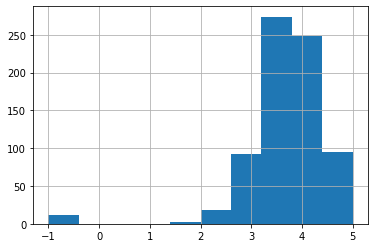

In [18]:
df.Rating.hist()

In [19]:
#Plotting histograms to see the distribution of data on some variables

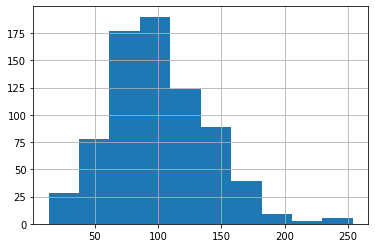

In [20]:
df.average_salary.hist()

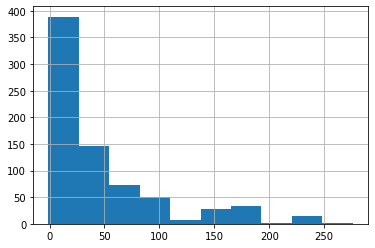

In [21]:
df.age.hist()

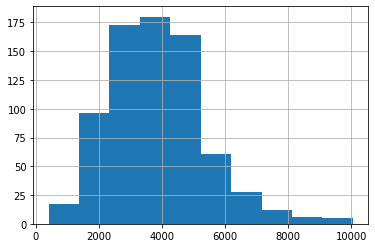

In [22]:
df.desc_len.hist()

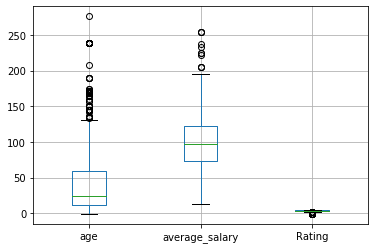

In [23]:
#Plotting boxplots on some continous variables
df.boxplot(column = ['age','average_salary','Rating'])

In [24]:
#creating a correlation matrix
df[['age','average_salary','Rating','desc_len']].corr()

,age,average_salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.163911
average_salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
desc_len,0.163911,0.078808,-0.012281,1.000000


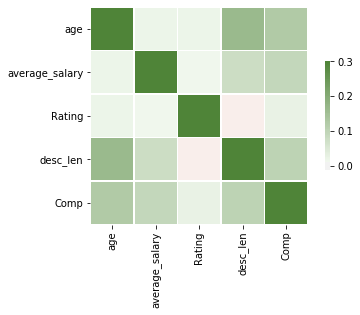

In [25]:
#Producing a heatmap so that relationship between four variables is seen
cmap = sea.diverging_palette(20, 120, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sea.heatmap(df[['age','average_salary','Rating','desc_len','Comp']].corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_text', 'States', 'Same State', 'age',
       'Python', 'R_Studio', 'Tableau', 'Spark', 'Excel', 'aws', 'job_simp',
       'seniority', 'desc_len', 'Comp'],
      dtype='object')

In [27]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_text', 'States','Same State', 'Python', 'R_Studio',
       'Spark', 'aws', 'Excel','Tableau', 'job_simp', 'seniority']]

graph for Location: total = 20


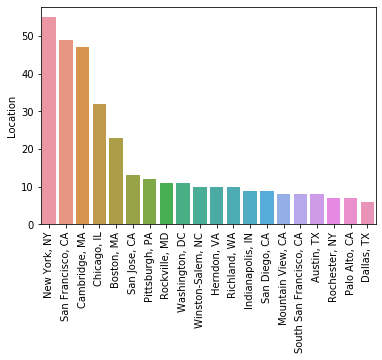

graph for Headquarters: total = 20


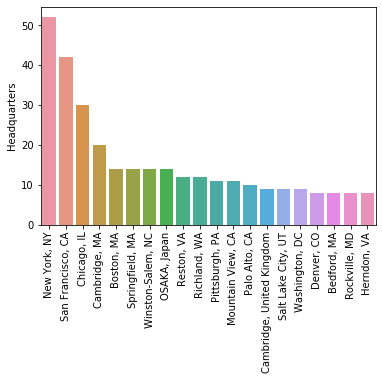

graph for company_text: total = 20


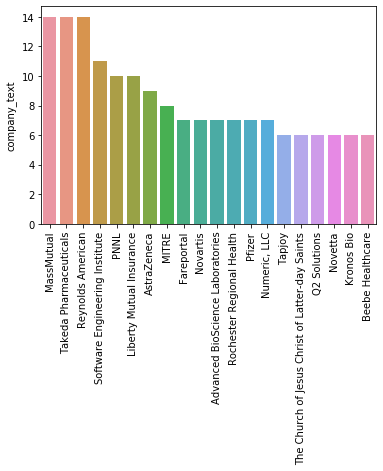

In [28]:
for i in df_cat[['Location','Headquarters','company_text']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sea.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [29]:
pd.pivot_table(df, index = 'job_simp', values = 'average_salary')

,average_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
machine learning,126.431818
manager,84.022727
na,84.853261


In [30]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'average_salary')

average_salary
job_simp         seniority                
analyst          jr              56.500000
                 na              61.155405
                 senior          79.092593
data engineer    na              96.701220
                 senior         124.689189
data scientist   jr             106.500000
                 na             107.043011
                 senior         138.956522
director         na             168.607143
machine learning na             119.133333
                 senior         142.071429
manager          na              84.022727
na               na              73.988189
                 senior         109.061404

In [31]:
pd.pivot_table(df, index = 'States', values = 'average_salary').sort_values('average_salary', ascending = False)

,average_salary
States,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [32]:
pd.set_option('display.max_rows',None)

In [33]:
pd.pivot_table(df, index = ['States','job_simp'], values = 'average_salary', aggfunc = 'count').sort_values('States', ascending = False)

average_salary
States job_simp                        
WI     na                             4
       data scientist                 3
       analyst                        3
WA     na                             1
       data scientist                17
       analyst                        3
VA     na                             5
       machine learning               2
       data scientist                18
       data engineer                 10
       analyst                        6
UT     data engineer                  3
       analyst                        4
       data scientist                 3
TX     na                             7
       data scientist                13
       data engineer                  8
TN     data scientist                 1
       data engineer                 10
       analyst                        2
SC     na                             1
RI     analyst                        1
PA     machine learning               7
       data engineer                  1
       data scientist                 6
       analyst                        8
       manager                        3
       na                             8
OR     data scientist                 3
       data engineer                  1
OH     na                             3
       data scientist                 7
       analyst                        4
NY     na                            12
       machine learning               2
       data scientist                40
       data engineer                  4
       analyst                       14
NM     data scientist                 3
NJ     data scientist                 4
       analyst                        6
       data engineer                  2
       manager                        2
       director                       2
       na                             1
NE     na                             4
NC     na                            12
       data scientist                 3
       data engineer                  6
MO     na                             3
       manager                        1
       data scientist                 3
       analyst                        2
MN     data engineer                  1
       analyst                        1
MI     manager                        2
       data scientist                 4
MD     na                            16
       data scientist                13
       data engineer                  3
       analyst                        3
MA     na                            46
       manager                        5
       director                       6
       data scientist                30
       data engineer                 12
       analyst                        4
LA     analyst                        1
       data engineer                  2
       na                             1
KY     na                             4
       data scientist                 2
KS     machine learning               3
IN     na                             4
       data scientist                 2
       data engineer                  4
IL     analyst                        3
       na                             6
       machine learning               2
       director                       6
       data scientist                15
       data engineer                  8
ID     analyst                        2
IA     analyst                        2
       data engineer                  3
GA     data scientist                 3
       na                             3
FL     data scientist                 7
       data engineer                  3
       analyst                        6
DE     na                             6
DC     data scientist                 5
       data engineer                  4
       analyst                        2
CT     na                             3
       data scientist                 2
CO     machine learning               1
       data engineer                  3
       analyst           

In [34]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'States', values = 'average_salary').sort_values('average_salary', ascending = False)
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_text', 'States', 'Same State', 'age',
       'Python', 'R_Studio', 'Tableau', 'Spark', 'Excel', 'aws', 'job_simp',
       'seniority', 'desc_len', 'Comp'],
      dtype='object')

In [35]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'Comp', 'hourly', 'employer_provided', 'Python', 'R_Studio', 'Spark', 'aws','Tableau', 'Excel', 'Type of ownership','average_salary']]

In [36]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'average_salary').sort_values('average_salary', ascending = False))

Rating
        average_salary
Rating                
-1.0        136.181818
 5.0        134.700000
 2.5        120.000000
 4.5        117.714286
 4.1        116.368421
 3.9        113.071429
 2.6        109.083333
 4.4        108.606061
 3.2        105.500000
 4.0        105.340426
 3.5        104.897959
 3.7        104.131148
 4.7        103.983871
 4.3        102.468750
 3.3        101.858974
 4.2        100.442308
 2.2         97.750000
 4.6         97.250000
 3.8         96.811475
 2.1         95.900000
 3.4         93.011364
 1.9         87.500000
 3.1         86.580000
 3.0         85.588235
 3.6         85.467391
 2.8         83.928571
 2.7         83.250000
 2.3         81.500000
 2.9         81.138889
 4.8         80.277778
 2.4         60.214286
Industry
                                          average_salary
Industry                                                
Other Retail Stores                           163.500000
Motion Picture Production & Distribution      146.0000

ValueError: Grouper for 'average_salary' not 1-dimensional

In [37]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'Python', values = 'average_salary', aggfunc = 'count')

Python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [39]:
#Creating a word cloud to understand what sort of keywords are often used by companies
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

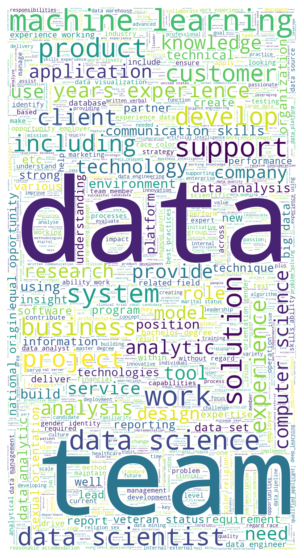

In [40]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [42]:
df.to_csv('EDA-Salary Data.csv', index = False)